In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
data=pd.read_csv('Umoja_data.csv')
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Umoja Fund,3.022920e+11,344671758.3,877.0422,877.0422,868.2718,12/30/2022
1,Umoja Fund,3.020420e+11,344671847.7,876.3168,876.3168,867.5536,12/29/2022
2,Umoja Fund,3.020070e+11,344681742.4,876.1918,876.1918,867.4299,12/28/2022
3,Umoja Fund,3.020270e+11,344753407.1,876.0658,876.0658,867.3051,12/27/2022
4,Umoja Fund,3.018260e+11,344721179.5,875.5668,875.5668,866.8112,12/23/2022


In [172]:
data.shape

(1664, 7)

In [173]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Umoja Fund,3.022920e+11,344671758.3,877.0422,877.0422,868.2718,12/30/2022
1,Umoja Fund,3.020420e+11,344671847.7,876.3168,876.3168,867.5536,12/29/2022
2,Umoja Fund,3.020070e+11,344681742.4,876.1918,876.1918,867.4299,12/28/2022
3,Umoja Fund,3.020270e+11,344753407.1,876.0658,876.0658,867.3051,12/27/2022
4,Umoja Fund,3.018260e+11,344721179.5,875.5668,875.5668,866.8112,12/23/2022


In [174]:
data['Net Asset Value'] = np.sqrt(data['Net Asset Value'])
data['Outstanding Number of Units'] = np.sqrt(data['Outstanding Number of Units'])

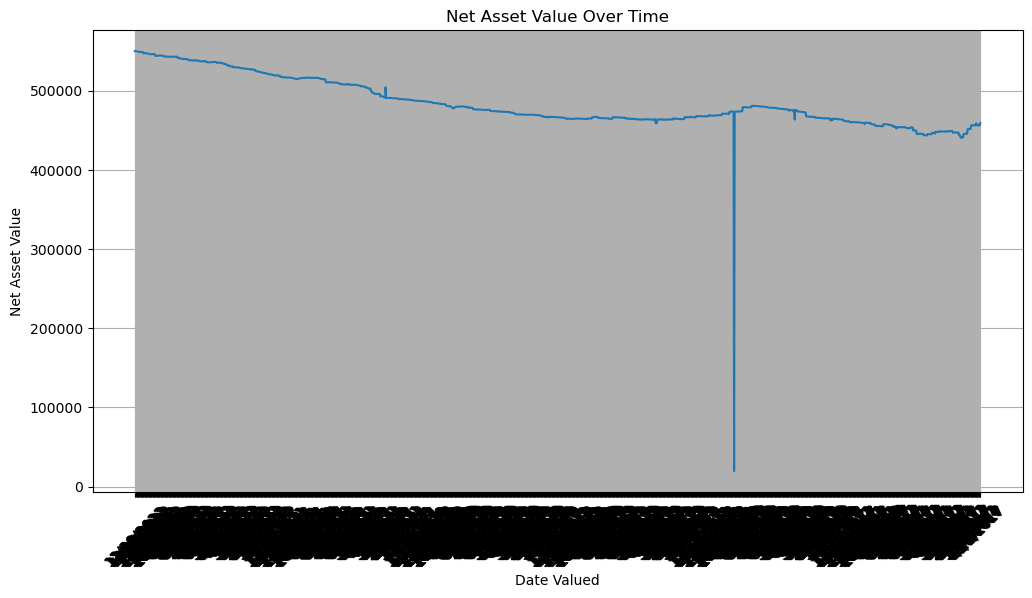

In [175]:
# Time series plot of NAV
plt.figure(figsize=(12, 6))
plt.plot(data['Date Valued'], data['Net Asset Value'])
plt.xlabel('Date Valued')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [176]:
data.set_index('Date Valued', inplace=True)

In [177]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit
Date Valued,,,,,,
12/30/2022,Umoja Fund,549810.876575,18565.337549,877.0422,877.0422,868.2718
12/29/2022,Umoja Fund,549583.478645,18565.339956,876.3168,876.3168,867.5536
12/28/2022,Umoja Fund,549551.635427,18565.606438,876.1918,876.1918,867.4299
12/27/2022,Umoja Fund,549569.831778,18567.536377,876.0658,876.0658,867.3051
12/23/2022,Umoja Fund,549386.931042,18566.668508,875.5668,875.5668,866.8112


In [178]:
df=data.filter(['Net Asset Value'])
dataset=df.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1332

In [179]:
df.head()

,Net Asset Value
Date Valued,
12/30/2022,549810.876575
12/29/2022,549583.478645
12/28/2022,549551.635427
12/27/2022,549569.831778
12/23/2022,549386.931042


In [180]:
## scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.99957101],
       [0.99951094],
       ...,
       [0.82327051],
       [0.82314228],
       [0.82851746]])

In [181]:
#create the training set
#create the scaled training set
train_data=scaled_data[0:training_data_len, :]
print(train_data[:5])

[[1.        ]
 [0.99957101]
 [0.99951094]
 [0.99954527]
 [0.99920022]]


In [182]:
#split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([1.        , 0.99957101, 0.99951094, 0.99954527, 0.99920022,
       0.99915043, 0.99932898, 0.99818674, 0.99797361, 0.99770714,
       0.99790829, 0.9977484 , 0.99755582, 0.99739244, 0.99748531,
       0.99449546, 0.99442992, 0.99522133, 0.99545915, 0.99528338,
       0.99461964, 0.99450409, 0.99436782, 0.99340829, 0.99337894,
       0.99297829, 0.99307501, 0.99276062, 0.99262931, 0.99253255,
       0.99243923, 0.9927468 , 0.99275199, 0.99267424, 0.9927969 ,
       0.99252909, 0.98864749, 0.98844972, 0.98863014, 0.98855728,
       0.98904636, 0.98923188, 0.98925788, 0.989166  , 0.98983673,
       0.98968598, 0.98966172, 0.98942255, 0.98944335, 0.98885562,
       0.98747423, 0.98741519, 0.98795168, 0.98695487, 0.98693228,
       0.98684888, 0.9868454 , 0.98673419, 0.98669248, 0.98643697])]
[0.986509981099374]


In [183]:
#convert the x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [184]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1272, 60, 1)

In [185]:
#buld LSTM model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [186]:
#complite the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [201]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1272/1272 [==============================] - 48s 37ms/step - loss: 0.0013


In [202]:
# #create the testing dataset
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [203]:
#convert the data to numpy array
x_test=np.array(x_test)

In [204]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(332, 60, 1)

In [205]:
#get the model prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

11/11 [==============================] - 0s 19ms/step


array([[461196.  ],
       [461192.16],
       [461183.7 ],
       [461169.78],
       [461153.84],
       [461136.2 ],
       [461118.9 ],
       [461116.25],
       [461121.16],
       [461031.22],
       [460901.4 ],
       [460751.4 ],
       [460600.  ],
       [460438.16],
       [460282.94],
       [460136.75],
       [460006.06],
       [459890.44],
       [459791.88],
       [459698.56],
       [459615.9 ],
       [459541.  ],
       [459476.34],
       [459405.84],
       [459338.3 ],
       [459175.66],
       [458977.8 ],
       [458768.72],
       [458567.3 ],
       [458373.53],
       [458198.53],
       [458049.94],
       [457926.53],
       [457845.97],
       [457790.47],
       [457754.03],
       [457704.12],
       [457652.38],
       [457612.25],
       [457580.8 ],
       [457556.47],
       [457537.72],
       [457518.4 ],
       [457500.5 ],
       [457458.47],
       [457407.66],
       [457383.75],
       [457374.62],
       [457364.56],
       [457355.78],


In [206]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 9870746.433252929
R-squared (R2): 0.5729122497964998
Mean Absolute Error (MAE): 2888.058395820454
Root Mean Squared Error (RMSE): 3141.774408396142


In [207]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\roma\AppData\Local\Temp\ipykernel_8516\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


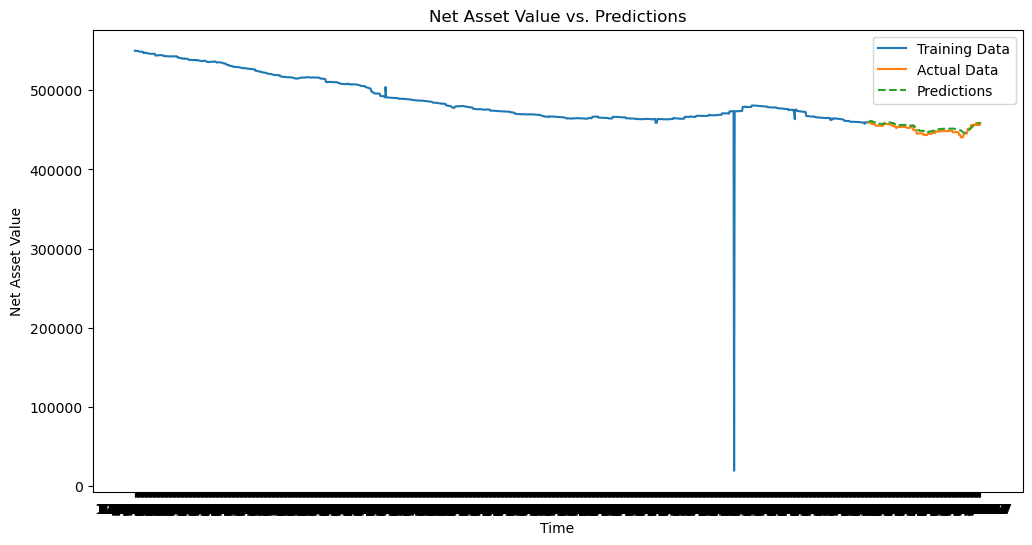

In [208]:
plt.figure(figsize=(12, 6))
plt.title('Net Asset Value vs. Predictions')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')
plt.plot(train['Net Asset Value'], label='Training Data')
plt.plot(valid['Net Asset Value'], label='Actual Data')
plt.plot(valid['Predictions'], label='Predictions', linestyle='--')
plt.legend()
plt.show()

In [209]:
train

,Net Asset Value
Date Valued,
12/30/2022,549810.876575
12/29/2022,549583.478645
12/28/2022,549551.635427
12/27/2022,549569.831778
12/23/2022,549386.931042
...,...
10/24/2017,459347.363114
10/23/2017,459296.200725
10/23/2017,459296.200725


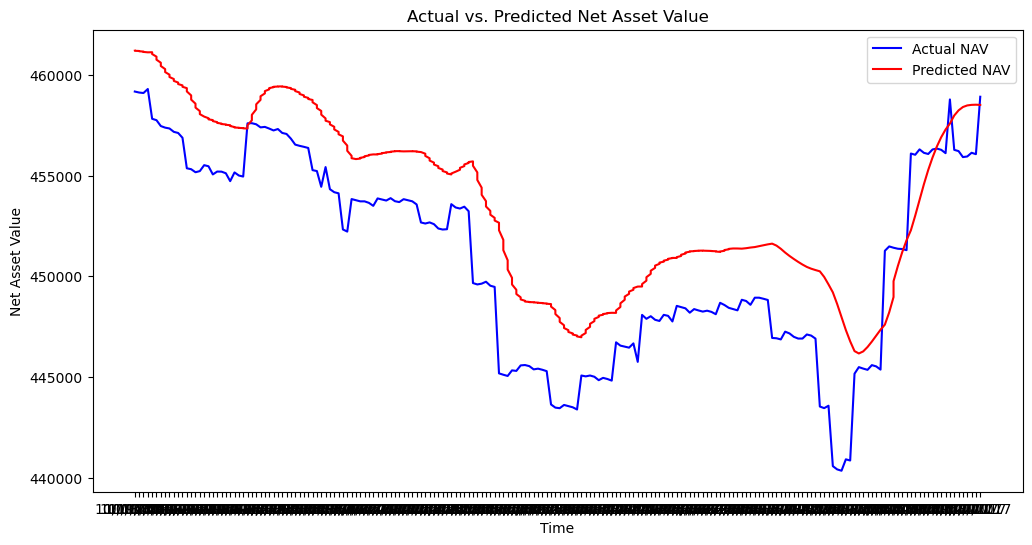

In [210]:
import matplotlib.pyplot as plt

# Assuming 'valid' is a DataFrame containing 'Net Asset Value' and 'Predictions' columns
plt.figure(figsize=(12, 6))
plt.title('Actual vs. Predicted Net Asset Value')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')

# Plot the actual 'Net Asset Value' in blue
plt.plot(valid['Net Asset Value'], label='Actual NAV', color='blue')

# Plot the 'Predictions' in red
plt.plot(valid['Predictions'], label='Predicted NAV', color='red')

plt.legend()
plt.show()


In [211]:
valid

,Net Asset Value,Predictions
Date Valued,,
10/19/2017,459169.903195,461196.00000
10/19/2017,459169.903195,461192.15625
10/18/2017,459120.899110,461183.68750
10/18/2017,459120.899110,461169.78125
10/17/2017,459096.939654,461153.84375
...,...,...
1/6/2017,455916.659051,458401.09375
1/5/2017,455947.365383,458480.78125
1/4/2017,456130.463793,458509.06250


In [212]:
from sklearn.ensemble import RandomForestRegressor
features = ['Outstanding Number of Units', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']
target = 'Net Asset Value'

X = data[features]
y = data[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X)


In [213]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions using the Random Forest model
rf_predictions = rf_model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, rf_predictions, squared=False)

# Calculate MSE
mse = mean_squared_error(y, rf_predictions)

# Calculate R-squared (R2)
r2 = r2_score(y, rf_predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 4398.806962788973
Mean Squared Error (MSE): 19349502.69588075
R-squared (R2): 0.9797928677578976


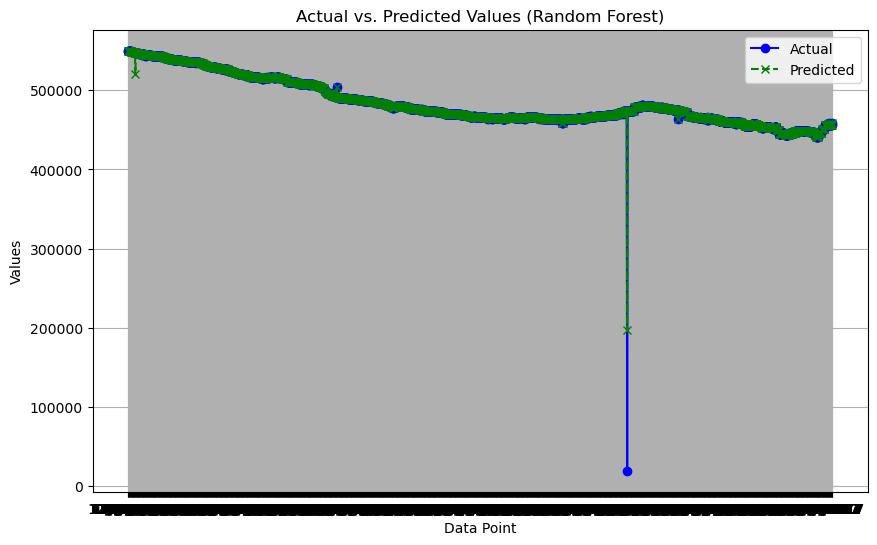

In [214]:

rf_predictions = rf_model.predict(X)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': rf_predictions})

# Plot actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', linestyle='--', color='green')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()
